In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


R-Runs
AB=At Bats
H=Hits
2B= Doubles
3B=Triples
HR=Homeruns
BB= Base on balls/Walk
SO=Strikeouts
SB= Stolen Bases
RA= Runs Allowed
ER= Earned Runs
Earned Run Average (ERA)
SHO=Shutouts
SV=Saves
CG=Complete Games
E=Errors
Number of predicted wins (W)

In [3]:
df.shape

(30, 17)

30 rows and 17 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


All values are numerical

In [5]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

No null values present in dataset

In [6]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


From the above table we can observe that data curve is spread widely and few outliers are present.

In [7]:
#Checking for duplicated data
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E


No duplicate values as well

#### Detecting outliers and removing them

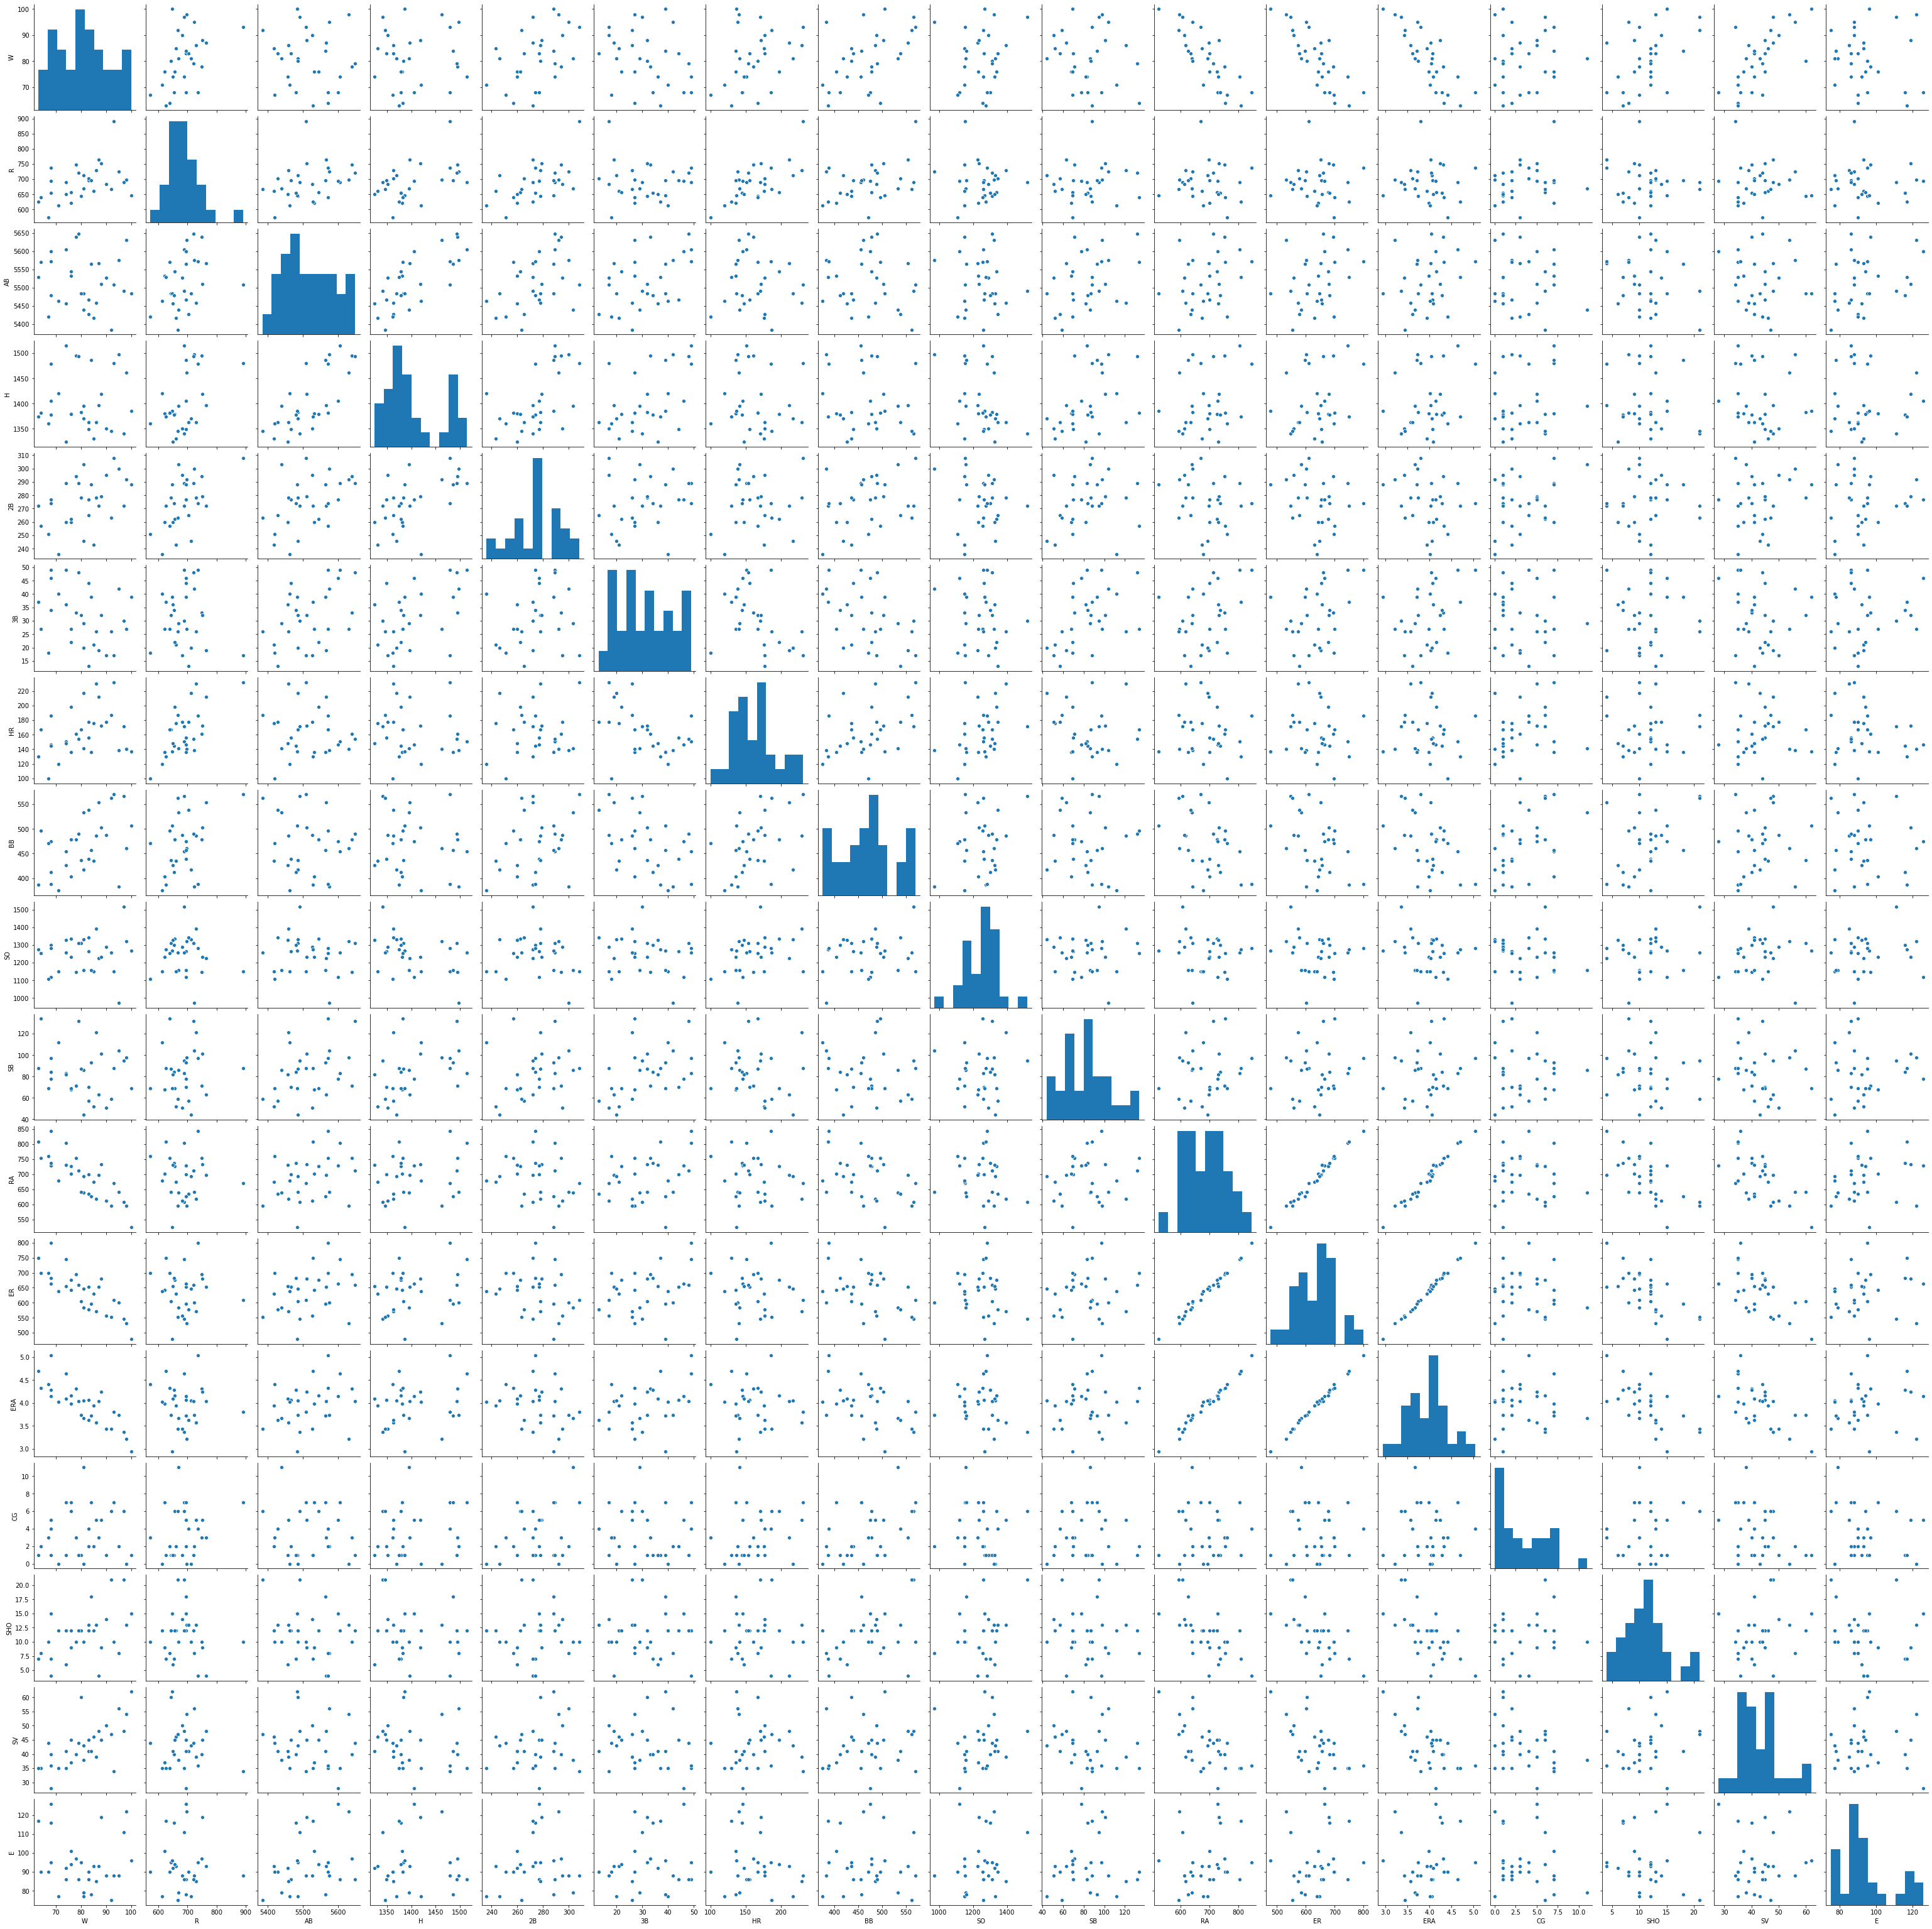

In [8]:
sns.pairplot(df)

We can see that there are some outliers present in runs,errors,sv and sho mainly;
we can also observe that one particular value in run is an outlier for all variables.


In [9]:
df['R'].sort_values()

23    573
22    613
3     622
24    626
19    640
8     644
15    647
28    650
18    655
13    656
12    661
25    667
2     669
20    683
17    689
4     689
14    694
26    696
1     696
16    697
21    703
7     713
27    720
0     724
11    729
29    737
9     748
10    751
6     764
5     891
Name: R, dtype: int64

We can notice that row 5 with value 891 acts as an outlier. Lets check it in dataframe

In [10]:
df[5:6]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.8,7,10,34,88


Since it acts as an outlier for most of the variables. Lets remove the row from dataset 

In [11]:
df=df.drop(5,axis=0)

In [12]:
df[:6]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93


##### Lets see the distribution of the data

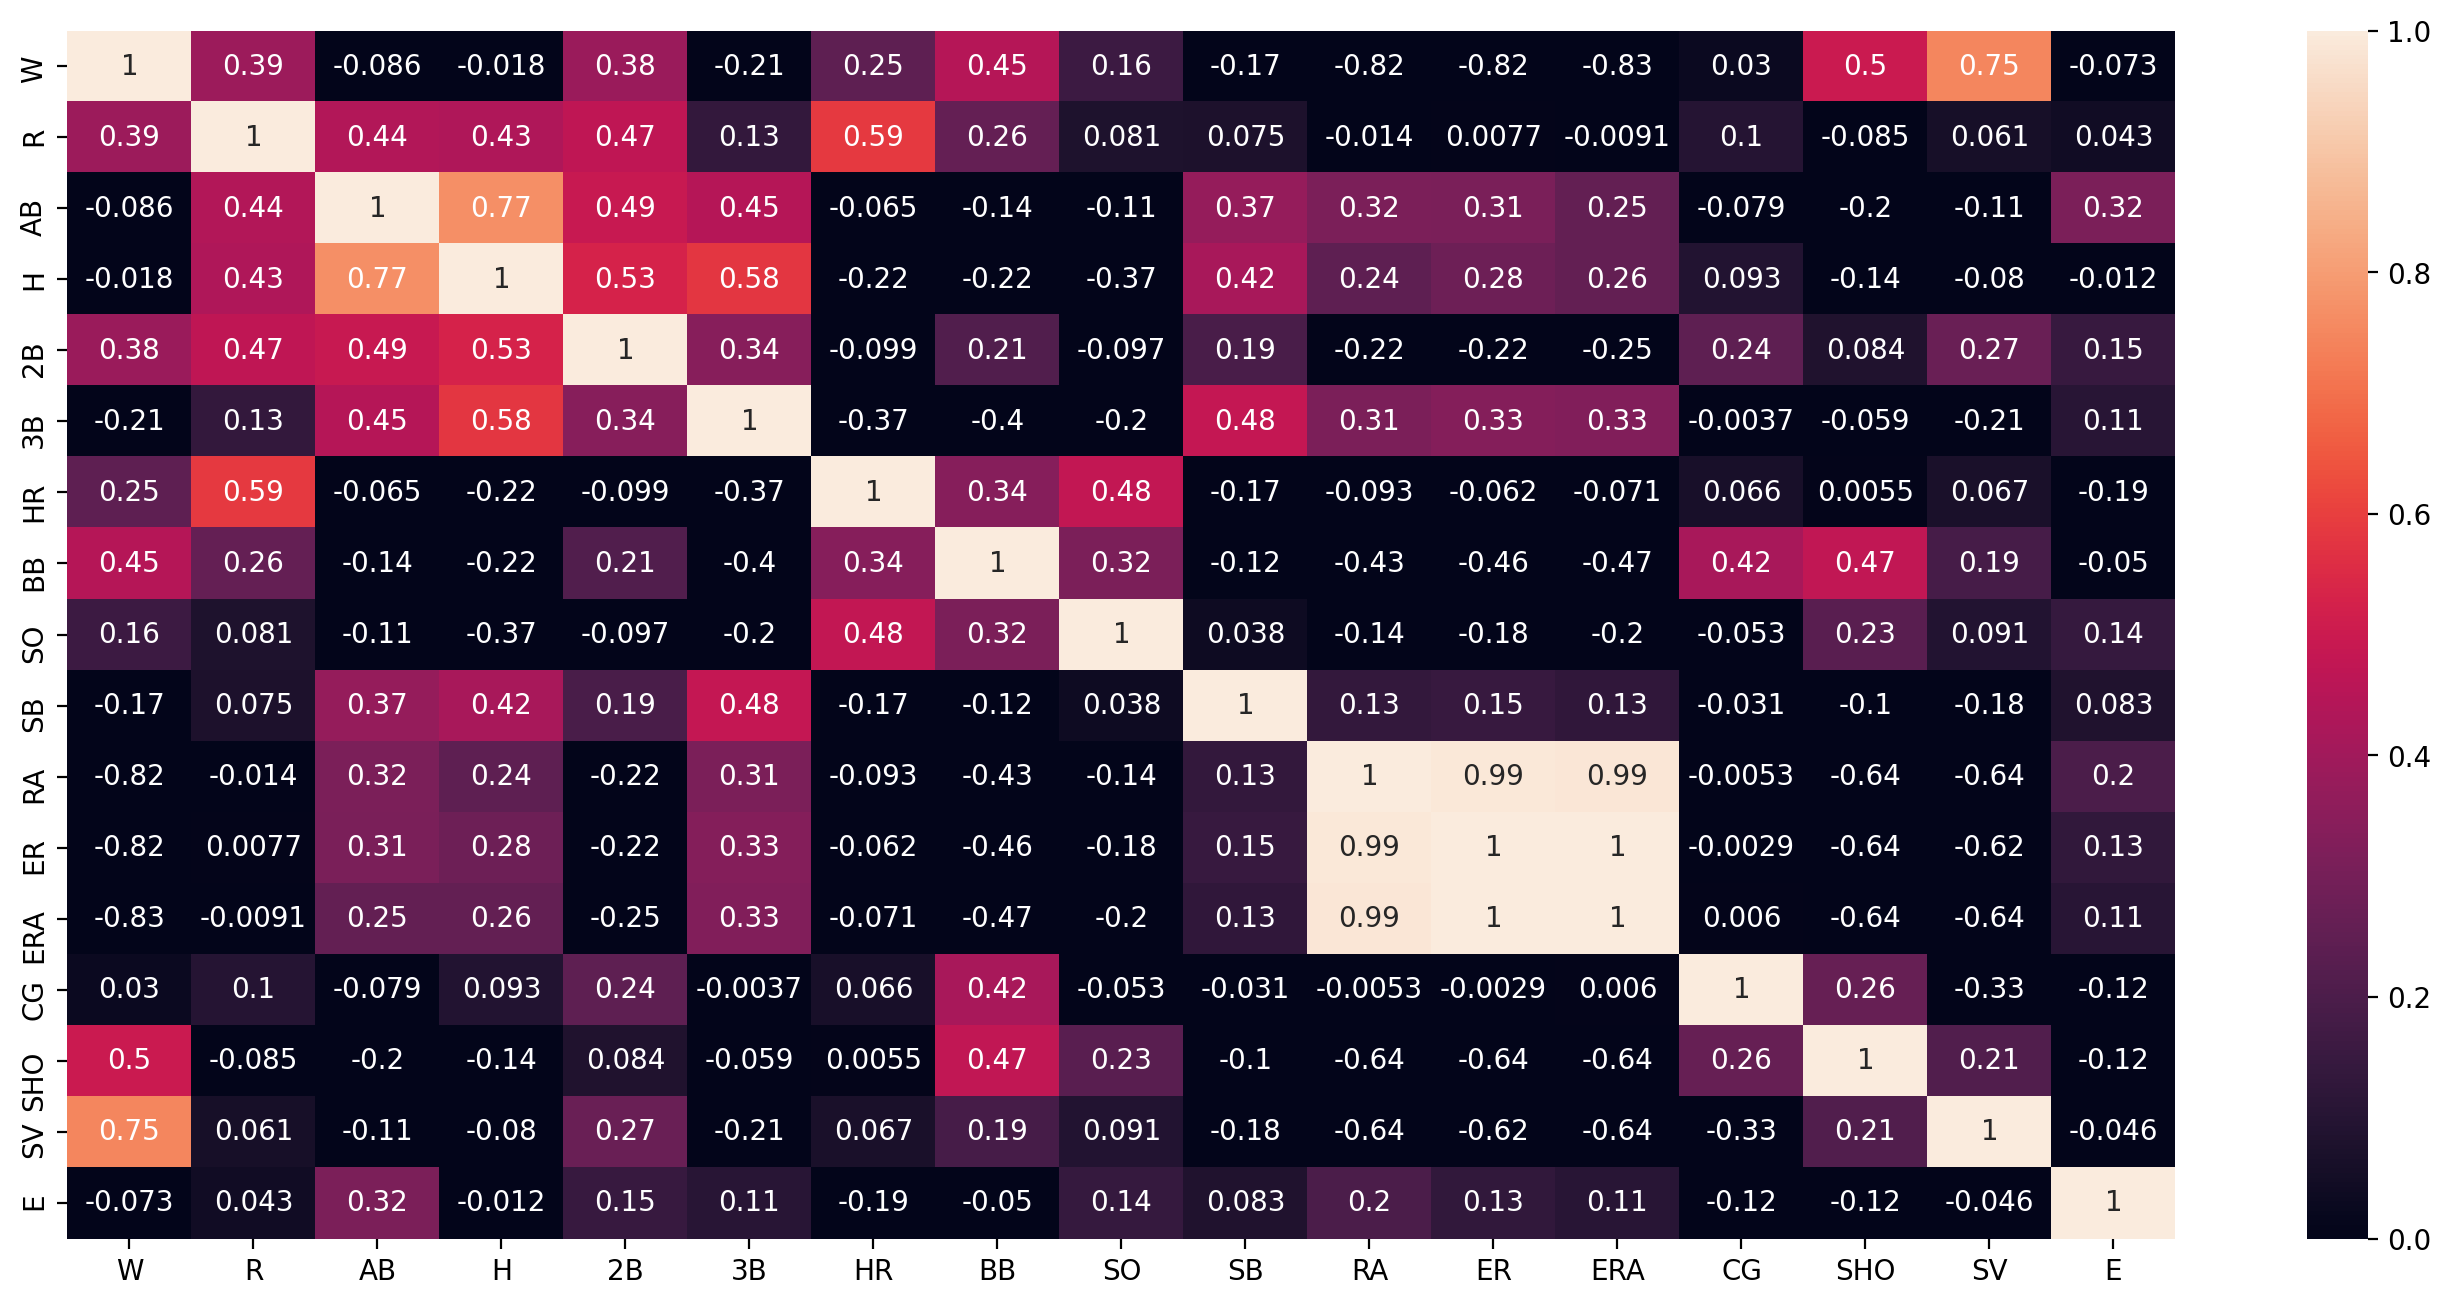

In [13]:
#before that lets check the correlation of variables
f=plt.figure(figsize=(17,8),dpi=200)
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=0)

We observe that Save is highly correlated ; ER,ERA and RA are negatively correlated ;
It shows that we can drop shutouts(SHO) and walks(BB)

In [14]:
df=df.drop(['SHO','BB','ERA','RA'],axis=1)

In [15]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'SO', 'SB', 'ER', 'CG', 'SV',
       'E'],
      dtype='object')

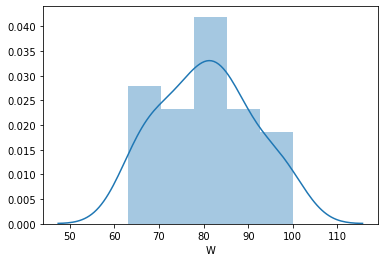

In [16]:
#univariate analysis
sns.distplot(df['W'])

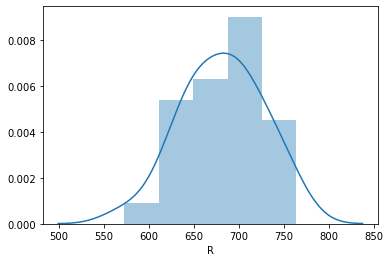

In [17]:
sns.distplot(df['R'])

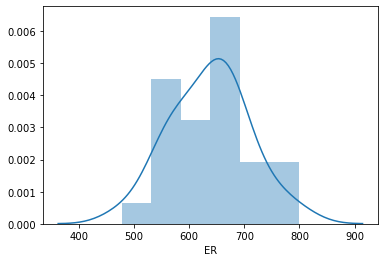

In [18]:
sns.distplot(df['ER'])

In [19]:
skewness, skew_name = [], []
for i in df:
    skewness.append(round(df[i].skew(),2))
    skew_name.append(i)
skew_df = pd.DataFrame(skewness, index=[skew_name], columns=['Skewness']).sort_values(by='Skewness', ascending=False)
skew_df[skew_df['Skewness']>0.5] 
skew_df[skew_df['Skewness']<-0.5] 

,Skewness


In [20]:
#outliers removal
from scipy import stats
from scipy.stats import zscore

df_new = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] # remove outliers
df_new = df.apply(zscore) # Normalization
print(df_new.describe())

                  W             R            AB             H            2B  \
count  2.900000e+01  2.900000e+01  2.900000e+01  2.900000e+01  2.900000e+01   
mean   1.990745e-16 -1.232730e-15 -4.915608e-15  4.440892e-16 -1.150780e-15   
std    1.017700e+00  1.017700e+00  1.017700e+00  1.017700e+00  1.017700e+00   
min   -1.720184e+00 -2.428670e+00 -1.866711e+00 -1.390895e+00 -2.214917e+00   
25%   -6.421118e-01 -7.009798e-01 -7.596054e-01 -6.854678e-01 -6.827633e-01   
50%    4.393396e-02  1.740844e-01 -7.830983e-02 -3.417983e-01  2.438440e-02   
75%    6.319732e-01  7.125854e-01  7.733096e-01  3.455406e-01  8.493900e-01   
max    1.906058e+00  1.856900e+00  1.880415e+00  2.063888e+00  1.733325e+00   

                 3B            HR            SO            SB            ER  \
count  2.900000e+01  2.900000e+01  2.900000e+01  2.900000e+01  2.900000e+01   
mean   8.422382e-17 -2.143879e-16  9.704881e-16  3.177535e-16  7.962979e-16   
std    1.017700e+00  1.017700e+00  1.017700e+00  1.

Standard deviation is reduced to 1.01, which implies that the data is normally spread

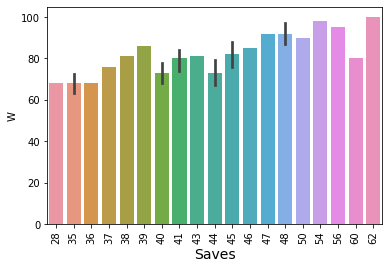

In [21]:
#bivariate analysis

sns.barplot('SV' ,'W', data=df)
plt.xlabel('Saves', fontsize=14)
plt.xticks(rotation ='vertical')
plt.show()

In [22]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'SO', 'SB', 'ER', 'CG', 'SV',
       'E'],
      dtype='object')

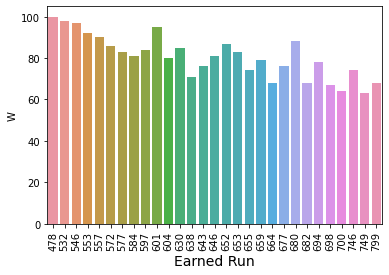

In [23]:
sns.barplot('ER' ,'W', data=df)
plt.xlabel('Earned Run', fontsize=14)
plt.xticks(rotation ='vertical')
plt.show()

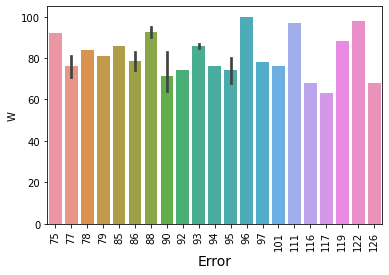

In [24]:
sns.barplot('E' ,'W', data=df)
plt.xlabel('Error', fontsize=14)
plt.xticks(rotation ='vertical')
plt.show()

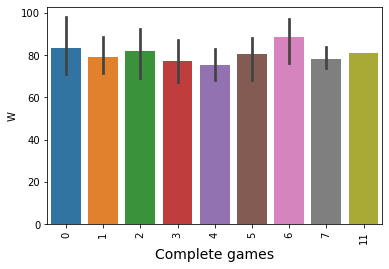

In [25]:
sns.barplot('CG' ,'W', data=df)
plt.xlabel('Complete games', fontsize=14)
plt.xticks(rotation ='vertical')
plt.show()

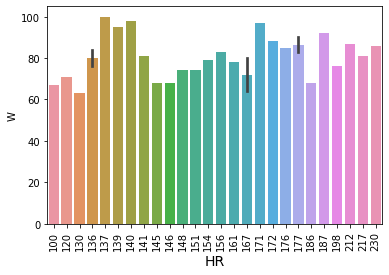

In [26]:
sns.barplot('HR' ,'W', data=df)
plt.xlabel('HR', fontsize=14)
plt.xticks(rotation ='vertical')
plt.show()

1.There is high wins when saves are nearly 50-65,except at 60;

2.if runs earned are less than 500, wins are more than 80


In [27]:
df1=df.copy
df=df_new

In [28]:
#train test split
from sklearn.model_selection import train_test_split

In [29]:
X=df.drop(['W'],axis=1)
y=df['W']

In [30]:
X=X.astype('int')
y=y.astype('int')

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [32]:
!pip install xgboost

In [33]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# ML Classification algorithms

In [34]:
def model(mod):
    md=mod()
    md.fit(X_train,y_train)
    predict=md.predict(X_test)
    print("model: {}".format(mod))
    print(confusion_matrix(y_test, predict))
    print(classification_report(y_test, predict))

In [35]:
model(SVC)
print("")
model(KNeighborsClassifier)
print("")
model(DecisionTreeClassifier)
print("")
model(RandomForestClassifier)
print("")
model(XGBClassifier)


model: <class 'sklearn.svm._classes.SVC'>
[[0 1 0]
 [0 7 0]
 [0 1 0]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.78      1.00      0.88         7
           1       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.26      0.33      0.29         9
weighted avg       0.60      0.78      0.68         9


model: <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
[[0 1 0]
 [0 7 0]
 [0 1 0]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.78      1.00      0.88         7
           1       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.26      0.33      0.29         9
weighted avg       0.60      0.78      0.68         9


model: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
[[0 

Except for decision tree and KNN, all the models have an accuracy of 78%. Lets tune hyperparameters to check if the accuracy is the same.

# Hyper parameter tuning

In [39]:
from sklearn.model_selection import GridSearchCV

print('model=',SVC)        
param_grid={ 'C':[0.1,1,10,100],
             'gamma':['scale','auto'],
             'kernel':['linear']}
grid=GridSearchCV(SVC(),param_grid,n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_params_)
grid_predictions=grid.predict(X_test)
print(accuracy_score(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
print("")

print('model=',DecisionTreeClassifier)
param_grid = {"max_depth": [80, 90, 100, 110],
              "max_features": range(3,12,2),
              "min_samples_leaf": range(2,8)}
grid=GridSearchCV(DecisionTreeClassifier(),param_grid,refit=True,verbose=3,n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_params_)
grid_predictions=grid.predict(X_test)
print(accuracy_score(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
print("")

print('model=',RandomForestClassifier)
param_grid= {'bootstrap': [True],'max_depth': [80, 90, 100],
             'max_features':  range(3,12,2),
             'min_samples_leaf':range(2,8),
             'min_samples_split': [2,4,8, 10,],
             'n_estimators': [100, 150,200]}
grid=GridSearchCV(RandomForestClassifier(),param_grid,n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_params_)
grid_predictions=grid.predict(X_test)
print(accuracy_score(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
print("")

print('model=',KNeighborsClassifier)
param_grid= dict(leaf_size=[10,20,30,40,50], n_neighbors=[2,3,5,10,15], p=[1,2])
grid=GridSearchCV(KNeighborsClassifier(),param_grid,refit=True,verbose=3,n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_params_)
grid_predictions=grid.predict(X_test)
print(accuracy_score(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

print('model=',XGBClassifier)
param_grid= {'max_depth':range(3,15,2),'min_child_weight':range(5,10)}
grid=GridSearchCV(XGBClassifier(),param_grid,refit=True,verbose=3,n_jobs=-1)
grid.fit(X_train,y_train)
print(grid.best_params_)
grid_predictions=grid.predict(X_test)
print(accuracy_score(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

model= <class 'sklearn.svm._classes.SVC'>
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
0.7777777777777778
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.78      1.00      0.88         7
           1       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.26      0.33      0.29         9
weighted avg       0.60      0.78      0.68         9


model= <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    1.5s finished


{'max_depth': 90, 'max_features': 5, 'min_samples_leaf': 4}
0.7777777777777778
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.78      1.00      0.88         7
           1       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.26      0.33      0.29         9
weighted avg       0.60      0.78      0.68         9


model= <class 'sklearn.ensemble._forest.RandomForestClassifier'>
{'bootstrap': True, 'max_depth': 80, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 100}
0.7777777777777778
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.78      1.00      0.88         7
           1       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.26      0.33      0.29         9
weigh

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


{'leaf_size': 10, 'n_neighbors': 5, 'p': 2}
0.7777777777777778
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.78      1.00      0.88         7
           1       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.26      0.33      0.29         9
weighted avg       0.60      0.78      0.68         9

model= <class 'xgboost.sklearn.XGBClassifier'>
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    4.0s finished


[19:23:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'max_depth': 3, 'min_child_weight': 5}
0.7777777777777778
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.78      1.00      0.88         7
           1       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.26      0.33      0.29         9
weighted avg       0.60      0.78      0.68         9



As shown above all the models have an accuracy of 78 %. hence we can use any one of the above models with mentioned parameters to predict the win in baseball